# LDA Klasifikasi Berita

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [1]:
## SETUP

# Import library dasar
import pandas as pd
import numpy as np
import time

# Import untuk LDA & Koherensi
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, HdpModel

# Import untuk Klasifikasi & Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Import untuk Visualisasi
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from matplotlib.lines import Line2D
import umap

print("Semua library berhasil diimpor.")



Semua library berhasil diimpor.


In [2]:
# Memuat Dataset
try:
    df = pd.read_csv('hasil_preprocessing_berita.csv')
    print(f"\nDataset berhasil dimuat. Jumlah data: {len(df)} baris.")
    print("Contoh data awal:")
    print(df.head())
except FileNotFoundError:
    print("\nError: File tidak ditemukan. Pastikan nama file CSV sudah benar.")
    # Jika file tidak ditemukan, hentikan proses.
    # df = pd.DataFrame()


Dataset berhasil dimuat. Jumlah data: 360 baris.
Contoh data awal:
                                          isi_berita  \
0  PerbesarPesawat KT-1B Woong Bee yang tergabung...   
1  PerbesarChief Executive Officer (CEO) Indonesi...   
2  PerbesarIlustrasi kebakaran. TEMPO/SubektiBaca...   
3  PerbesarKepala Badan Gizi Nasional Dadan Hinda...   
4  PerbesarKetua Dewan Pengarah BRIN, Megawati So...   

                                 hasil_preprocessing kategori_berita  
0  ['perbesarpesawat', 'ktb', 'woong', 'bee', 'ga...         politik  
1  ['perbesarchief', 'executive', 'officer', 'ceo...         politik  
2  ['perbesarilustrasi', 'bakar', 'temposubektiba...         politik  
3  ['perbesarkepala', 'badan', 'gizi', 'nasional'...         politik  
4  ['perbesarketua', 'dewan', 'arah', 'brin', 'me...         politik  



Kamus dibuat dan difilter. Jumlah kata unik: 810

--- Menjalankan HDP untuk estimasi jumlah topik... ---


✅ HDP mengestimasi ada sekitar: 20 topik.

--- Menjalankan pencarian koherensi dari 5 hingga 40 topik... ---
Selesai menghitung untuk 5 topik. Skor Koherensi: 0.6037
Selesai menghitung untuk 10 topik. Skor Koherensi: 0.5783
Selesai menghitung untuk 15 topik. Skor Koherensi: 0.5795
Selesai menghitung untuk 20 topik. Skor Koherensi: 0.5665
Selesai menghitung untuk 25 topik. Skor Koherensi: 0.5400
Selesai menghitung untuk 30 topik. Skor Koherensi: 0.5332
Selesai menghitung untuk 35 topik. Skor Koherensi: 0.5064

Total waktu pencarian koherensi: 1.55 menit


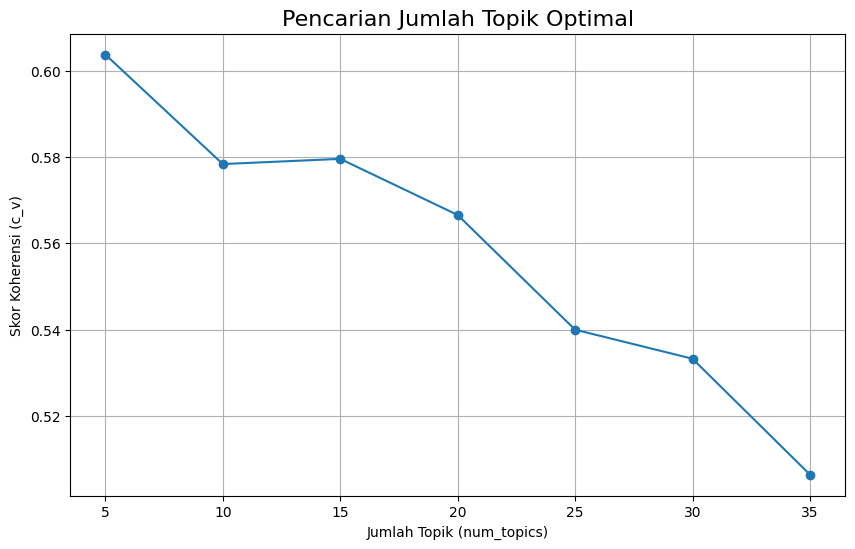


✅ Jumlah topik optimal yang ditemukan: 5

--- Melatih model LDA final dengan topik optimal... ---

--- Topik-topik yang Ditemukan oleh Model LDA ---
Topik: 0
Kata-kata: 0.026*"'rp'," + 0.021*"'persen'," + 0.019*"'indonesia'," + 0.017*"'pertamina'," + 0.016*"'harga'," + 0.015*"'terbang'," + 0.014*"'pt'," + 0.010*"'tumpang'," + 0.010*"'tingkat'," + 0.009*"'oktober'," + 0.008*"'usaha'," + 0.008*"'turun'," + 0.008*"'us'," + 0.008*"'juta'," + 0.008*"'impor',"

Topik: 1
Kata-kata: 0.036*"'main'," + 0.023*"'indonesia'," + 0.023*"'tanding'," + 0.022*"'tim'," + 0.022*"'menang'," + 0.021*"'kalah'," + 0.018*"'liga'," + 0.015*"'gol'," + 0.015*"'latih'," + 0.015*"'timnas'," + 0.014*"'laga'," + 0.013*"'vs'," + 0.011*"'lawan'," + 0.011*"'champions'," + 0.010*"'open',"

Topik: 2
Kata-kata: 0.010*"'israel'," + 0.008*"'negara'," + 0.007*"'orang'," + 0.007*"'gaza'," + 0.007*"'jakarta'," + 0.007*"'kota'," + 0.007*"'jalan'," + 0.007*"'menteri'," + 0.006*"'gempa'," + 0.006*"'masyarakat'," + 0.006*"'wilayah

In [4]:
## EKSTRAKSI FITUR LDA & PENCARIAN TOPIK OPTIMAL

# Siapkan data untuk Gensim
documents = [doc.split() for doc in df['hasil_preprocessing']]
dictionary = Dictionary(documents)

# Filter Kamus
# Membuang kata yang terlalu jarang atau terlalu sering muncul.
# Ini meningkatkan kualitas topik secara signifikan.
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"\nKamus dibuat dan difilter. Jumlah kata unik: {len(dictionary)}")


# Estimasi Jumlah Topik dengan HDP
print("\n--- Menjalankan HDP untuk estimasi jumlah topik... ---")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
estimated_num_topics = len(hdp_model.print_topics())
print(f"✅ HDP mengestimasi ada sekitar: {estimated_num_topics} topik.")


# Mencari Jumlah Topik Terbaik dengan Plot Koherensi
def compute_coherence_values_multicore(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    start_time = time.time()
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, workers=3)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        current_coherence = coherencemodel.get_coherence()
        coherence_values.append(current_coherence)
        print(f"Selesai menghitung untuk {num_topics} topik. Skor Koherensi: {current_coherence:.4f}")
    total_time = time.time() - start_time
    print(f"\nTotal waktu pencarian koherensi: {total_time/60:.2f} menit")
    return coherence_values

# Atur rentang pencarian di sekitar hasil HDP
search_start = max(2, estimated_num_topics - 15)
search_limit = estimated_num_topics + 20
search_step = 5

print(f"\n--- Menjalankan pencarian koherensi dari {search_start} hingga {search_limit} topik... ---")
coherence_values = compute_coherence_values_multicore(dictionary=dictionary, corpus=corpus, texts=documents,
                                                    start=search_start, limit=search_limit, step=search_step)

# Tampilkan grafik
x = range(search_start, search_limit, search_step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.title("Pencarian Jumlah Topik Optimal", fontsize=16)
plt.xlabel("Jumlah Topik (num_topics)")
plt.ylabel("Skor Koherensi (c_v)")
plt.xticks(x)
plt.grid(True)
plt.show()

# Pilih jumlah topik terbaik (yang memiliki skor koherensi tertinggi)
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"\n✅ Jumlah topik optimal yang ditemukan: {optimal_num_topics}")


# Latih Model LDA Final & Ekstrak Fitur ---
print("\n--- Melatih model LDA final dengan topik optimal... ---")
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,
                         random_state=42, passes=15)

print("\n--- Topik-topik yang Ditemukan oleh Model LDA ---")
    # Tampilkan 15 kata teratas untuk setiap topik
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topik: {idx}")
    print(f"Kata-kata: {topic}\n")

# Ekstrak fitur (distribusi topik) untuk setiap dokumen
def get_lda_features(lda_model, bow_corpus):
    features = []
    for doc_bow in bow_corpus:
        topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_features = [0.0] * optimal_num_topics
        for topic_id, prob in topic_distribution:
            doc_features[topic_id] = prob
        features.append(doc_features)
    return np.array(features)

X = get_lda_features(lda_model, corpus)
y = df['kategori_berita'].values

print("Ekstraksi fitur LDA selesai.")
print(f"Bentuk matriks fitur (X): {X.shape}")

In [5]:
## PELATIHAN DAN EVALUASI MODEL KLASIFIKASI

# Bagi Data menjadi Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi. Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")


# Latih Model Klasifikasi (SVM)
classifier = SVC(kernel='linear', random_state=42, probability=True)

print("\n--- Memulai pelatihan model SVM... ---")
classifier.fit(X_train, y_train)
print("Pelatihan selesai.")


# Evaluasi Kinerja Model
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- HASIL EVALUASI AKHIR ---")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred))


Data dibagi. Jumlah data latih: 288, Jumlah data uji: 72

--- Memulai pelatihan model SVM... ---
Pelatihan selesai.

--- HASIL EVALUASI AKHIR ---
Akurasi Model: 50.00%

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

      ekonomi       0.55      0.75      0.63         8
      hiburan       0.00      0.00      0.00         8
        hukum       0.00      0.00      0.00         8
internasional       0.33      0.88      0.48         8
   lingkungan       0.00      0.00      0.00         8
     olahraga       1.00      0.25      0.40         8
     otomotif       0.64      0.88      0.74         8
      politik       0.67      0.75      0.71         8
    sepakbola       0.80      1.00      0.89         8

     accuracy                           0.50        72
    macro avg       0.44      0.50      0.43        72
 weighted avg       0.44      0.50      0.43        72



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Membuat visualisasi UMAP untuk perbandingan Train vs Test... ---


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-1922531978.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Spectral", len(labels))


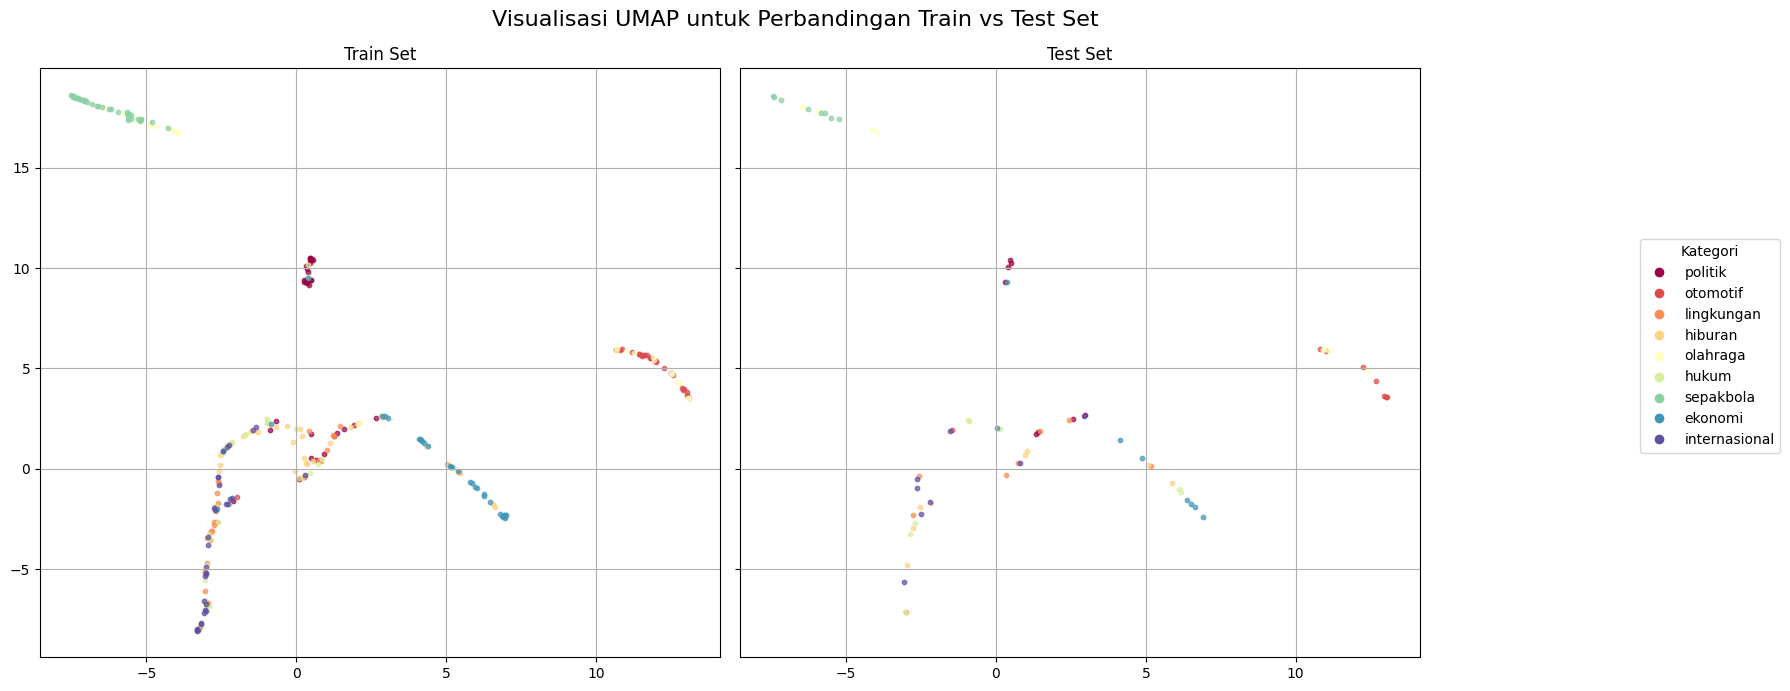


--- Selesai ---


In [6]:
## ANALISIS LANJUTAN DAN VISUALISASI (UMAP)

print("\n--- Membuat visualisasi UMAP untuk perbandingan Train vs Test... ---")

# Siapkan Data untuk Visualisasi
labels = list(pd.Series(y_train).unique())
label_map = {label: i for i, label in enumerate(labels)}
y_train_numeric = pd.Series(y_train).map(label_map).values
y_test_numeric = pd.Series(y_test).map(label_map).values

# Gabungkan, skalakan, dan terapkan UMAP
X_combined = np.concatenate((X_train, X_test), axis=0)
X_scaled = StandardScaler().fit_transform(X_combined)
reducer = umap.UMAP(n_components=2, random_state=42)
X_2d_combined = reducer.fit_transform(X_scaled)
x2d_train = X_2d_combined[:len(X_train)]
x2d_test = X_2d_combined[len(X_train):]

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
colors = cm.get_cmap("Spectral", len(labels))

axes[0].set_title("Train Set")
for i, label_name in enumerate(labels):
    axes[0].scatter(x2d_train[y_train_numeric == i, 0], x2d_train[y_train_numeric == i, 1],
                    color=colors(i / len(labels)), alpha=0.7, s=10)
axes[0].grid(True)

axes[1].set_title("Test Set")
for i, label_name in enumerate(labels):
    axes[1].scatter(x2d_test[y_test_numeric == i, 0], x2d_test[y_test_numeric == i, 1],
                    color=colors(i / len(labels)), alpha=0.7, s=10)
axes[1].grid(True)

fig.suptitle("Visualisasi UMAP untuk Perbandingan Train vs Test Set", fontsize=16)

# Buat handle legenda secara manual
legend_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=colors(i / len(labels)), markersize=8)
                    for i, label in enumerate(labels)]

fig.legend(handles=legend_handles, title="Kategori", loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

print("\n--- Selesai ---")